# **Data Cleaning and EDA**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [81]:
df = pd.read_excel('/content/drive/MyDrive/DAL/Assignment 4/car_evaluation.xlsx')
col_names = ['buying', 'maint' , 'doors','persons','lug_boot', 'safety', 'target']
df.columns  = col_names

In [82]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [83]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [84]:
df

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [85]:
missing_values = df.isna().sum()
missing_values

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

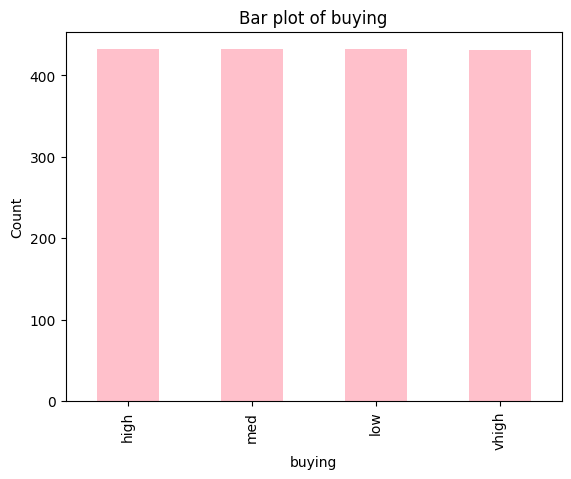

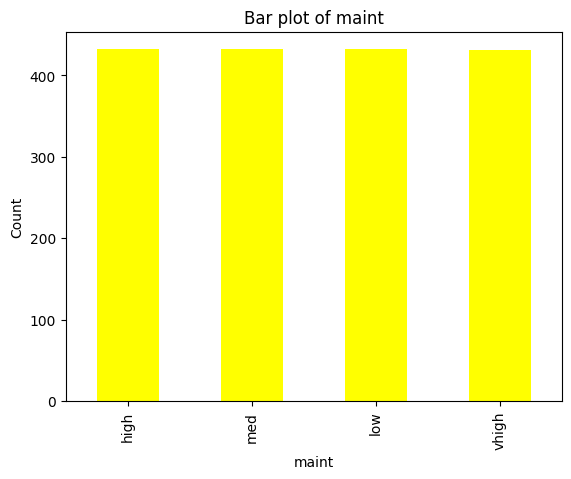

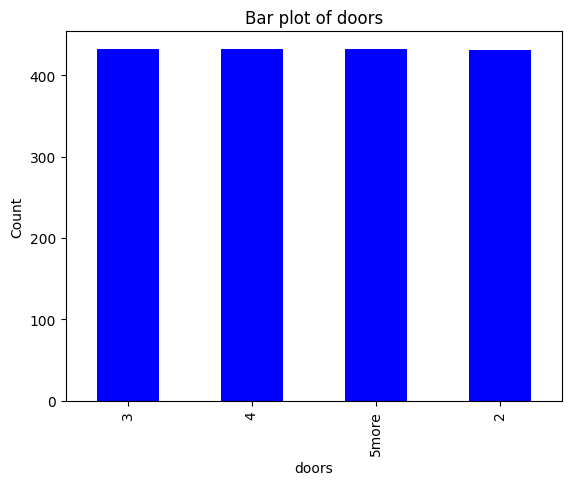

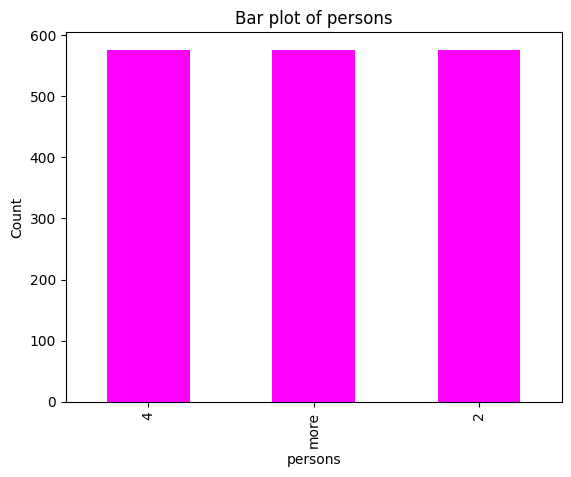

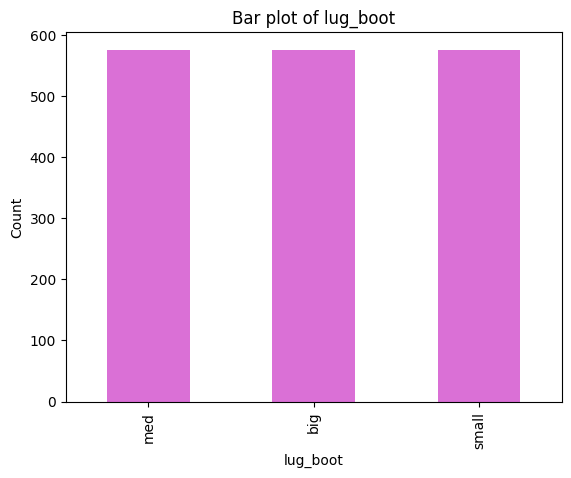

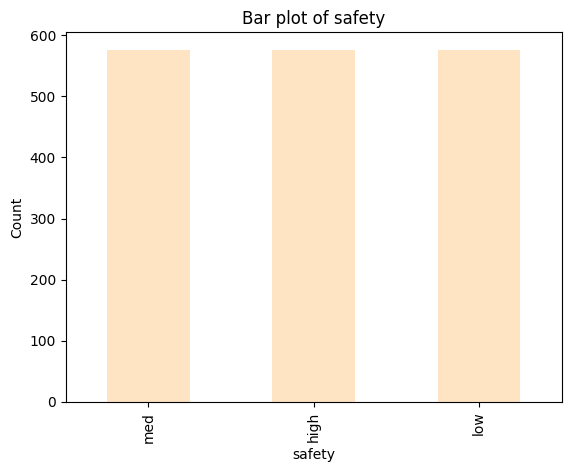

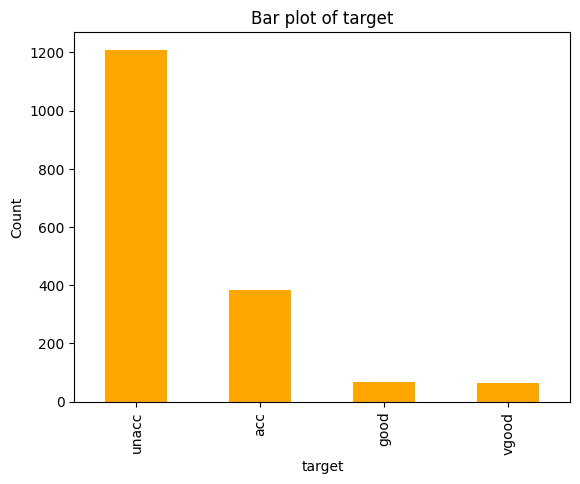

In [86]:
# Define a list of different colors
colors = ['pink', 'yellow', 'blue', 'magenta', 'orchid', 'bisque', 'orange']

# Create bar plots for each categorical column with different colors
for i, column in enumerate(col_names):
    plt.figure()
    df[column].value_counts().plot(kind='bar', color=colors[i])
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.show()

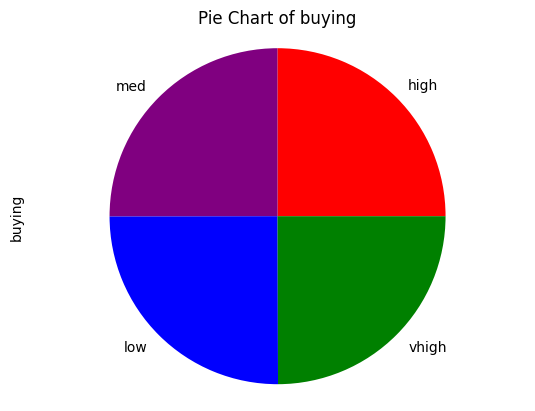

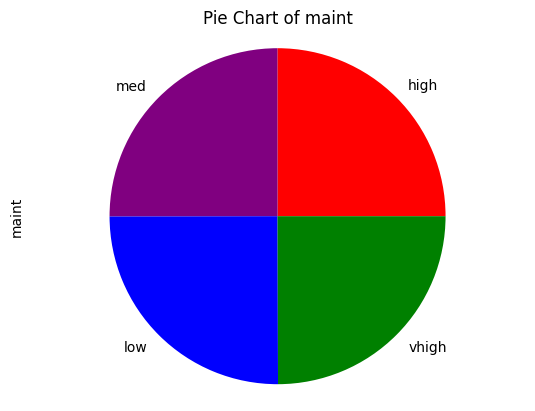

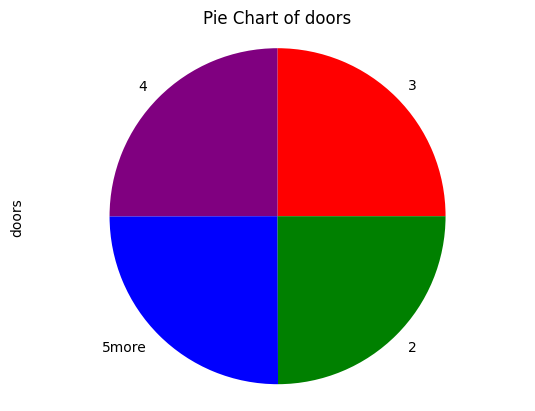

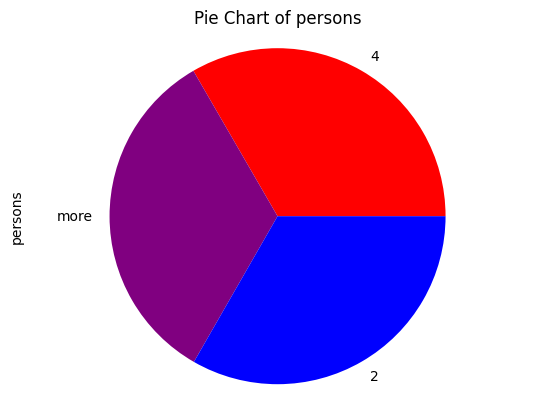

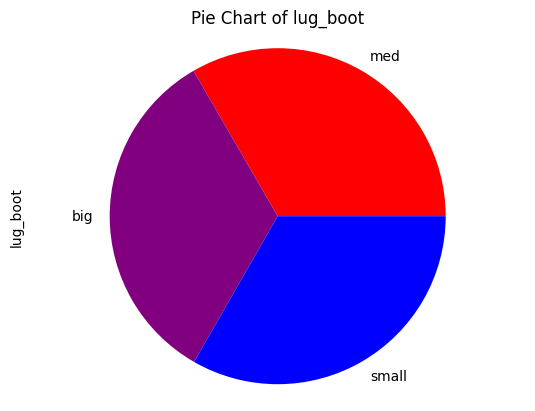

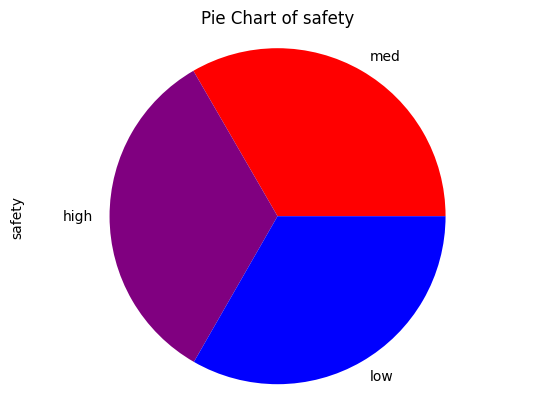

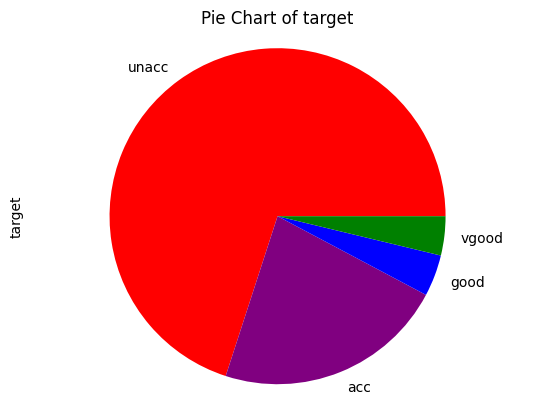

In [87]:
# Define a list of different colors
colors = ['red', 'purple', 'blue', 'green', 'orange', 'maroon', 'cyan']

# Create pie charts for each categorical column with different colors
for i, column in enumerate(col_names):
    plt.figure()
    df[column].value_counts().plot(kind='pie', colors=colors)
    plt.title(f'Pie Chart of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
    plt.show()


# **Decision Tree Model**

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

!pip install category_encoders
import category_encoders as ce

In [89]:
encoder = ce.OrdinalEncoder(cols=col_names)
encoded_data = encoder.fit_transform(df)
encoded_data

,buying,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1722,4,4,4,3,2,1,4
1723,4,4,4,3,2,2,3
1724,4,4,4,3,3,3,1
1725,4,4,4,3,3,1,4


In [90]:
# decision tree implementation

X = encoded_data.drop('target', axis=1)  # Features
y = encoded_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(report)


Accuracy: 0.97
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       237
           2       0.96      0.92      0.94        77
           3       0.83      0.88      0.86        17
           4       0.75      0.80      0.77        15

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



In [91]:
corr_matrix = encoded_data.corr()
print(corr_matrix)


            buying     maint     doors   persons  lug_boot    safety    target
buying    1.000000 -0.001043 -0.001043 -0.000952 -0.000952  0.000952  0.286273
maint    -0.001043  1.000000 -0.001043 -0.000952 -0.000952  0.000952  0.254378
doors    -0.001043 -0.001043  1.000000 -0.000952 -0.000952  0.000952  0.056075
persons  -0.000952 -0.000952 -0.000952  1.000000 -0.000869  0.000869  0.336622
lug_boot -0.000952 -0.000952 -0.000952 -0.000869  1.000000  0.000869  0.121120
safety    0.000952  0.000952  0.000952  0.000869  0.000869  1.000000 -0.281560
target    0.286273  0.254378  0.056075  0.336622  0.121120 -0.281560  1.000000


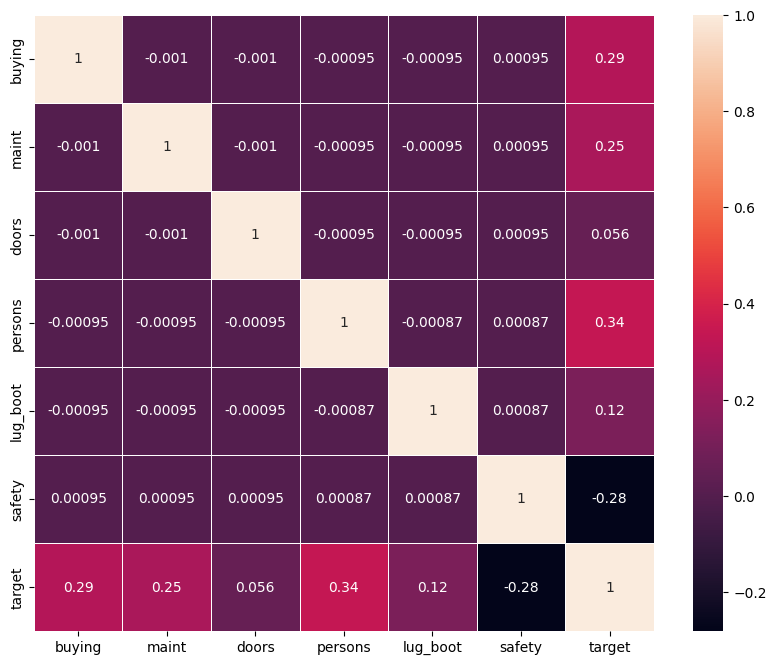

In [92]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="rocket", linewidths=0.5)
plt.show()

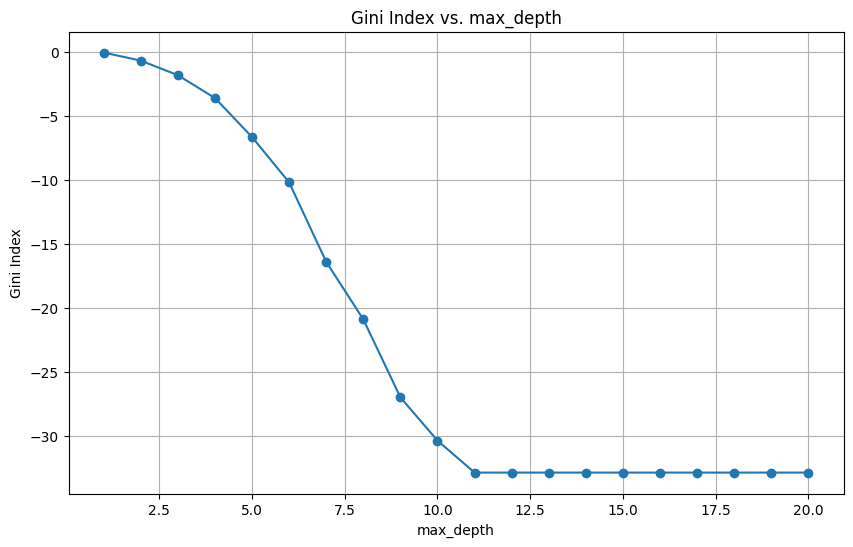

In [93]:
gini_index_values = []
max_depth_values = np.arange(1, 21)

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='gini', random_state=42)
    clf.fit(X, y)
    gini_index = 1 - sum((clf.tree_.impurity))
    gini_index_values.append(gini_index)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, gini_index_values, marker='o')
plt.title('Gini Index vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()

Depth 1: Training Accuracy = 70.38%, Test Accuracy = 68.50%
Depth 2: Training Accuracy = 77.70%, Test Accuracy = 78.03%
Depth 3: Training Accuracy = 78.64%, Test Accuracy = 81.21%
Depth 4: Training Accuracy = 84.79%, Test Accuracy = 86.13%
Depth 5: Training Accuracy = 87.55%, Test Accuracy = 87.86%
Depth 6: Training Accuracy = 93.70%, Test Accuracy = 92.49%
Depth 7: Training Accuracy = 94.42%, Test Accuracy = 92.20%
Depth 8: Training Accuracy = 98.04%, Test Accuracy = 95.66%
Depth 9: Training Accuracy = 98.84%, Test Accuracy = 95.95%
Depth 10: Training Accuracy = 99.71%, Test Accuracy = 95.66%
Depth 11: Training Accuracy = 99.93%, Test Accuracy = 96.53%
Depth 12: Training Accuracy = 100.00%, Test Accuracy = 96.53%
Depth 13: Training Accuracy = 100.00%, Test Accuracy = 96.53%
Depth 14: Training Accuracy = 100.00%, Test Accuracy = 96.53%
Depth 15: Training Accuracy = 100.00%, Test Accuracy = 96.53%
Depth 16: Training Accuracy = 100.00%, Test Accuracy = 96.53%
Depth 17: Training Accuracy 

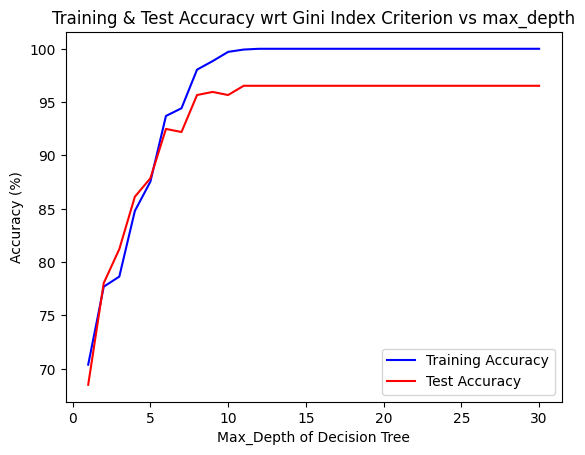

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create lists to store accuracy values
train_acc_gini = []
test_acc_gini = []

# Define a range of depths to explore
depths = range(1, 31)

# Create and evaluate Decision Tree models for different depths
for depth in depths:
    # Instantiate the Decision Tree Classifier model with criterion 'gini'
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=30)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on both training and test data
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate training and test accuracy
    train_acc = accuracy_score(y_train, y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100

    # Print the accuracy for the current depth
    print(f"Depth {depth}: Training Accuracy = {train_acc:.2f}%, Test Accuracy = {test_acc:.2f}%")

    # Store accuracy values in lists
    train_acc_gini.append(train_acc)
    test_acc_gini.append(test_acc)

# Create a plot to visualize training and test accuracy
plt.plot(depths, train_acc_gini, label='Training Accuracy',color='blue')
plt.plot(depths, test_acc_gini, label='Test Accuracy',color='red')
plt.legend()
plt.xlabel('Max_Depth of Decision Tree')
plt.ylabel('Accuracy (%)')
plt.title('Training & Test Accuracy wrt Gini Index Criterion vs max_depth')
plt.show()

Training-set accuracy score with gini index criterion: 0.9993
Test-set accuracy score with gini index criterion: 0.9653


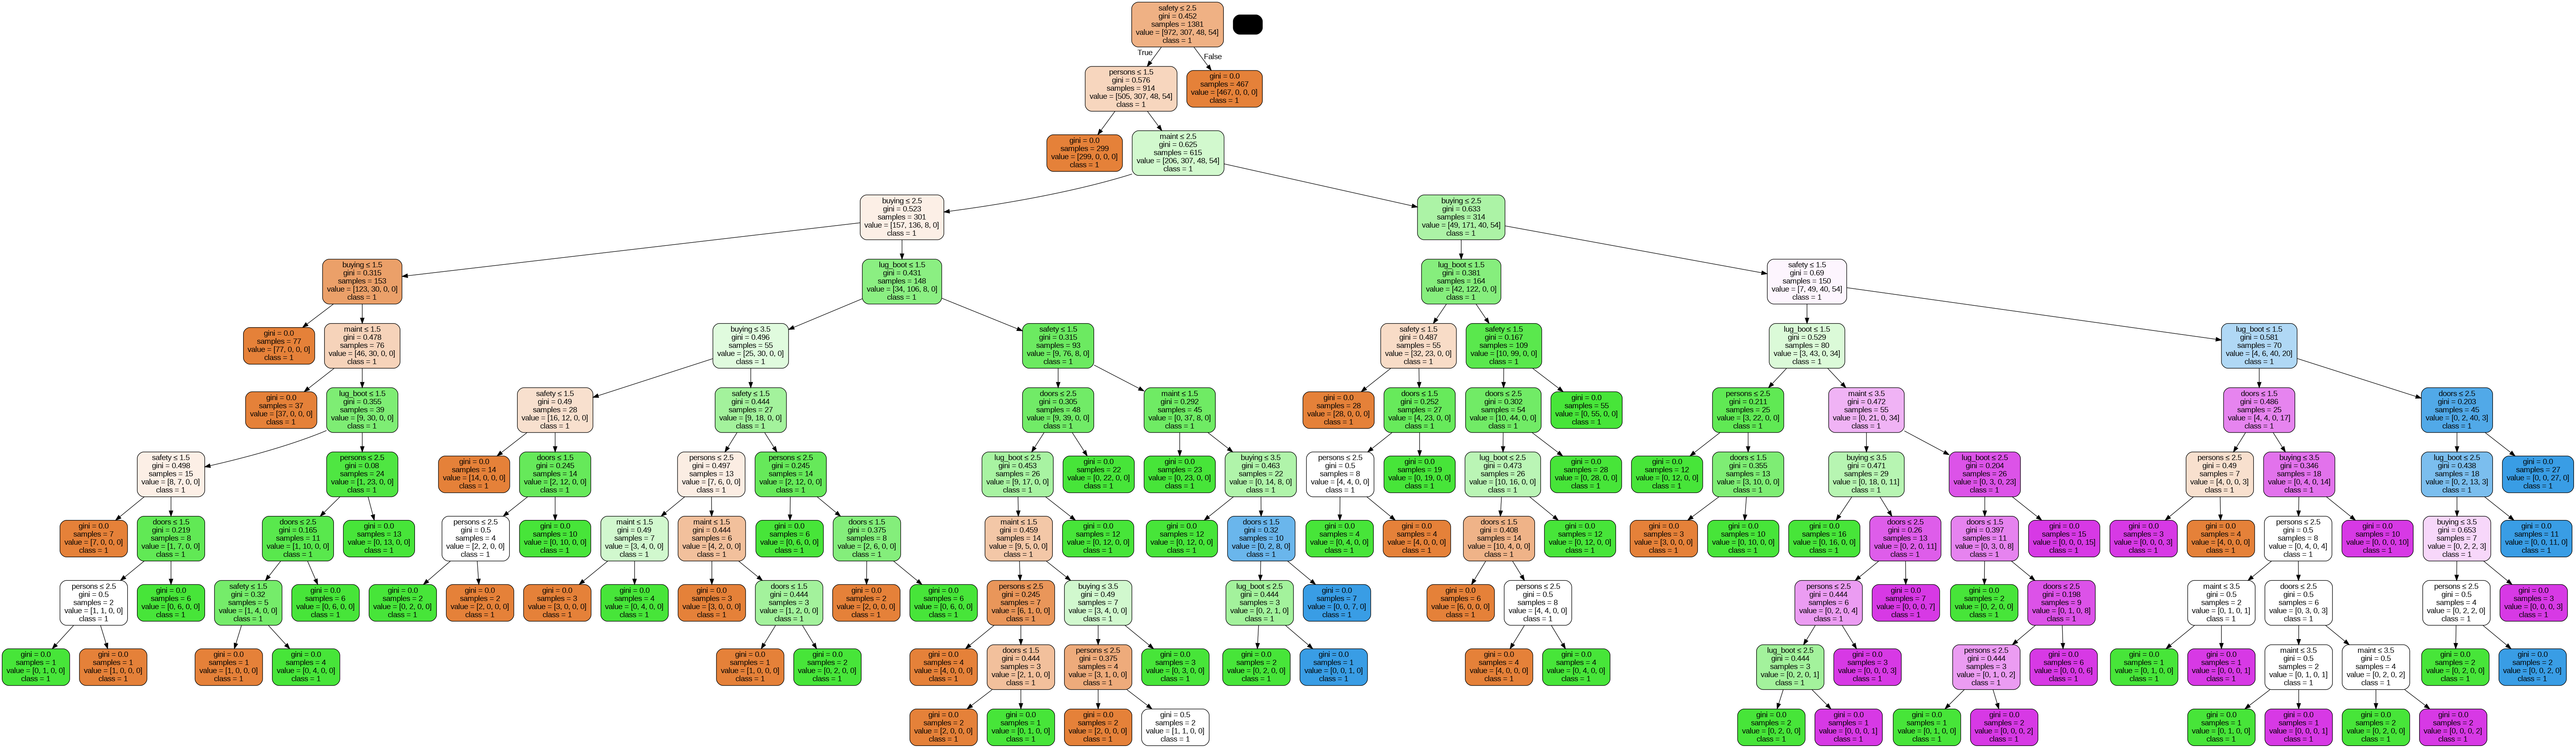

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Convert y_train to a list of strings for class names
class_names = y_train.astype(str)

# Create a Decision Tree model with specific parameters
modelgini = DecisionTreeClassifier(criterion='gini', max_features=5, max_depth=11, random_state=30)

# Fit the model to the training data
modelgini.fit(X_train, y_train)

# Calculate and print the training accuracy
y_pred_train_ginifinal = modelgini.predict(X_train)
print(f'Training-set accuracy score with gini index criterion: {accuracy_score(y_train, y_pred_train_ginifinal):0.4f}')

# Calculate and print the test accuracy
y_pred_ginifinal = modelgini.predict(X_test)
print(f'Test-set accuracy score with gini index criterion: {accuracy_score(y_test, y_pred_ginifinal):0.4f}')

# Create a graphviz representation of the decision tree
dt_graphviz = export_graphviz(modelgini, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)

# Create a PyDotPlus graph from the graphviz data
pydot_graph = pydotplus.graph_from_dot_data(dt_graphviz)

# Display the decision tree as an image
Image(pydot_graph.create_png())

Training-set accuracy score with entropy index criterion: 0.9964
Test-set accuracy score with entropy index criterion: 0.9624


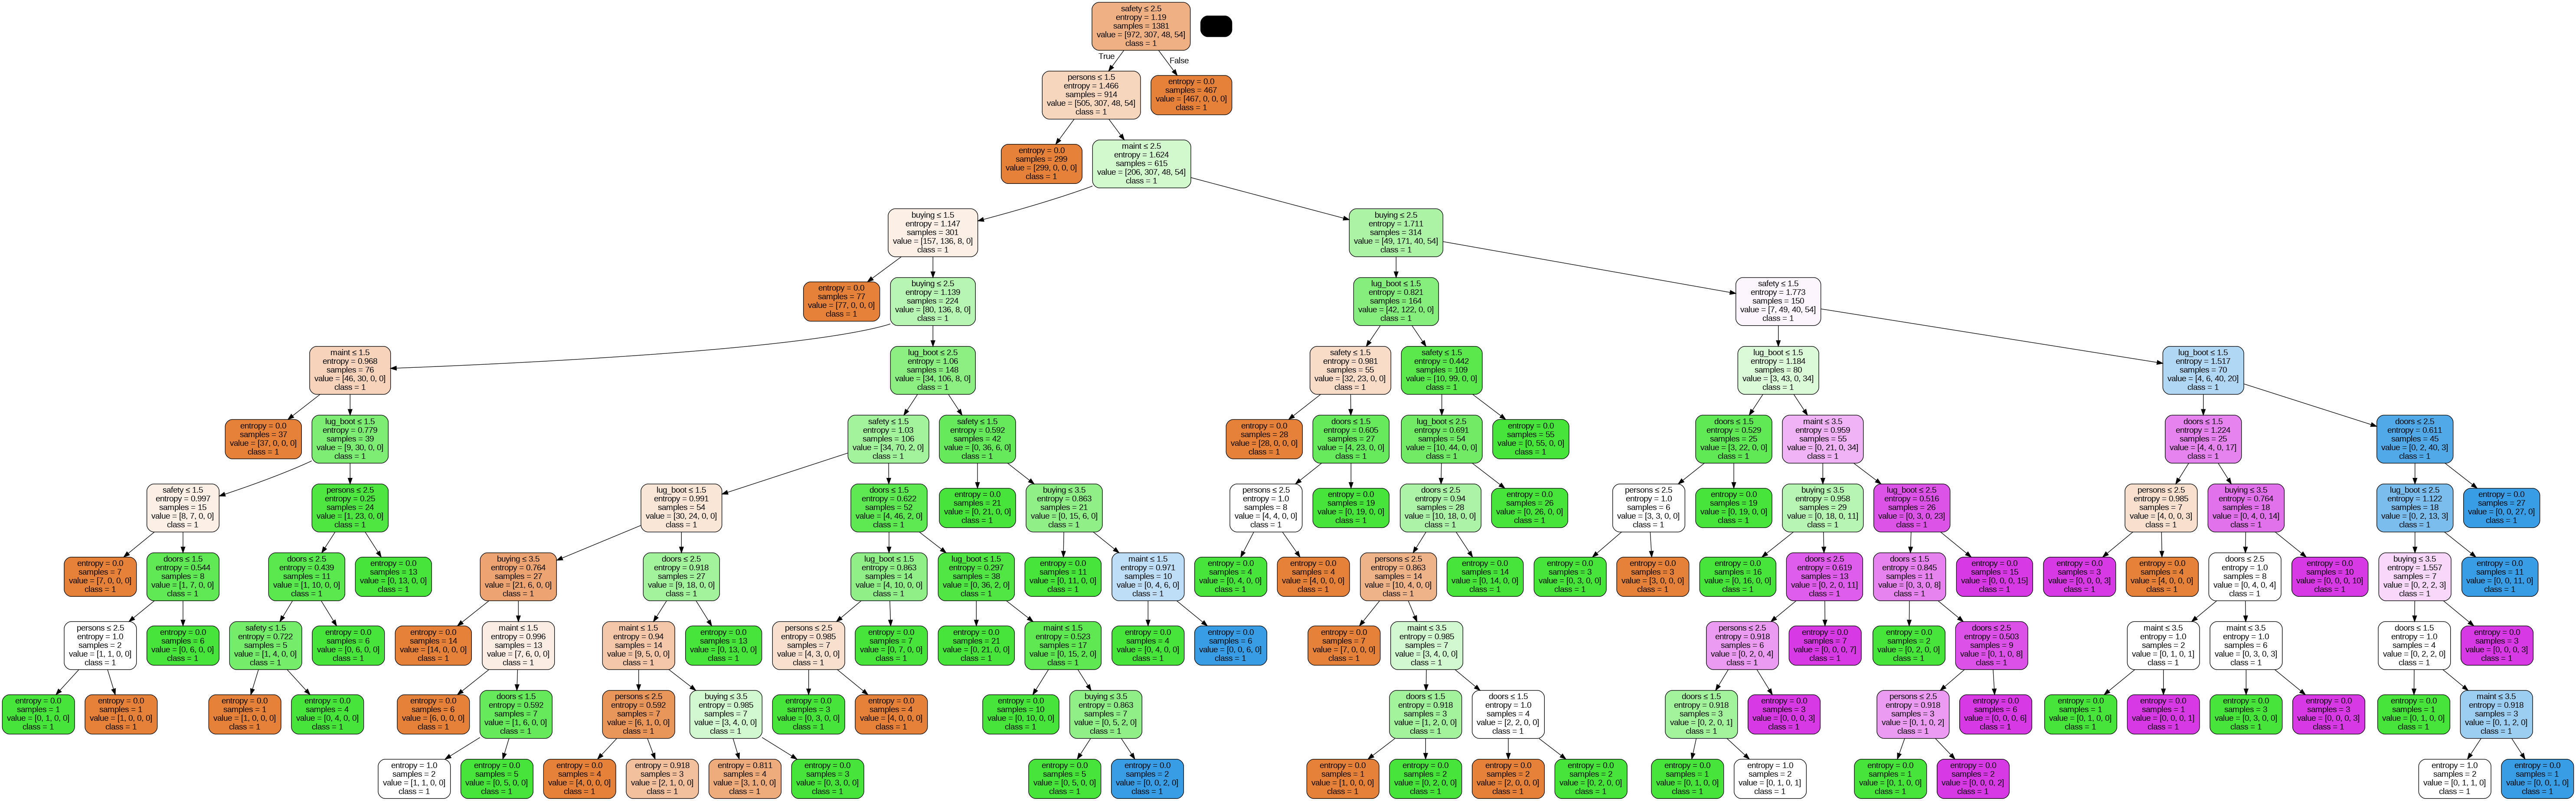

In [96]:
# Create a Decision Tree model with specific parameters using 'entropy' criterion
model_entropy = DecisionTreeClassifier(criterion='entropy', max_features=5, max_depth=11, random_state=30)

# Fit the model to the training data
model_entropy.fit(X_train, y_train)

# Calculate and print the training accuracy for 'entropy' criterion
y_pred_train_entropy = model_entropy.predict(X_train)
print(f'Training-set accuracy score with entropy index criterion: {accuracy_score(y_train, y_pred_train_entropy):0.4f}')

# Calculate and print the test accuracy for 'entropy' criterion
y_pred_entropy = model_entropy.predict(X_test)
print(f'Test-set accuracy score with entropy index criterion: {accuracy_score(y_test, y_pred_entropy):0.4f}')

# Create a graphviz representation of the decision tree for 'entropy' criterion
dt_graphviz_entropy = export_graphviz(model_entropy, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)

# Create a PyDotPlus graph from the graphviz data
pydot_graph_entropy = pydotplus.graph_from_dot_data(dt_graphviz_entropy)

# Display the decision tree with 'entropy' criterion as an image
Image(pydot_graph_entropy.create_png())

# You can also compare accuracy and decision tree structures for both 'gini' and 'entropy' criteria

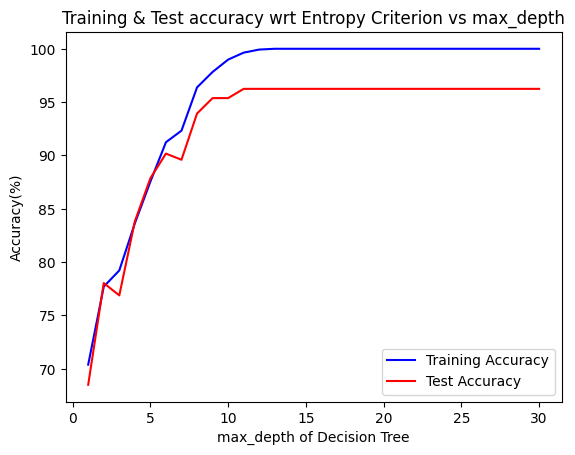

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Instantiate the Decision Tree Classifier model with 'entropy' criterion for different depths
y_pred_train_entropy = []
y_pred_entropy = []
train_acc_entropy, test_acc_entropy = [], []

depths = range(1, 31)

# Fit the model to data, make predictions, and check accuracy
model_entropy = []

for i in range(1, 31):
    model = DecisionTreeClassifier(criterion='entropy', max_features=5, max_depth=i, random_state=30)
    model.fit(X_train, y_train)
    model_entropy.append(model)

    y_pred_train_entropy.append(model.predict(X_train))
    y_pred_entropy.append(model.predict(X_test))
    train_acc_entropy.append(accuracy_score(y_train, y_pred_train_entropy[i - 1]) * 100)
    test_acc_entropy.append(accuracy_score(y_test, y_pred_entropy[i - 1]) * 100)

# Plot training and test accuracies for different depths
plt.plot(depths, train_acc_entropy, label='Training Accuracy',color='blue')
plt.plot(depths, test_acc_entropy, label='Test Accuracy',color='red')
plt.xlabel('max_depth of Decision Tree')
plt.ylabel('Accuracy(%)')
plt.title('Training & Test accuracy wrt Entropy Criterion vs max_depth')
plt.legend()
plt.show()

In [98]:
# Create a Decision Tree model with specific parameters using 'entropy' criterion
model_entropy_final = DecisionTreeClassifier(criterion='entropy', max_features=5, max_depth=10, random_state=30)

# Fit the model to the training data
model_entropy_final.fit(X_train, y_train)

# Calculate and print the training accuracy for 'entropy' criterion
y_pred_train_entropy_final = model_entropy_final.predict(X_train)
print(f'Training-set accuracy score with entropy index criterion: {accuracy_score(y_train, y_pred_train_entropy_final):0.4f}')

# Calculate and print the test accuracy for 'entropy' criterion
y_pred_entropy_final = model_entropy_final.predict(X_test)
print(f'Test-set accuracy score with entropy index criterion: {accuracy_score(y_test, y_pred_entropy_final):0.4f}')


Training-set accuracy score with entropy index criterion: 0.9899
Test-set accuracy score with entropy index criterion: 0.9538


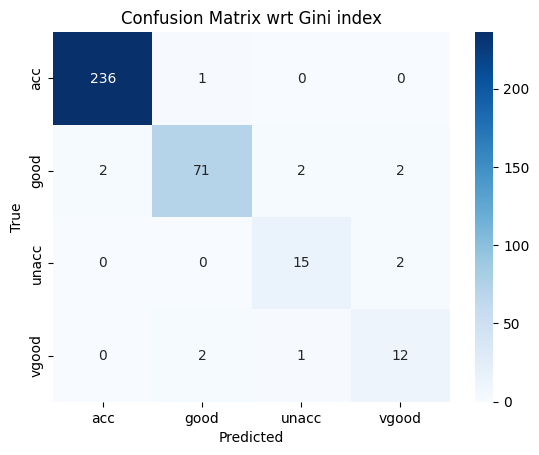

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Create a confusion matrix for the 'gini' criterion model
cm1 = confusion_matrix(y_test, y_pred_ginifinal)

# Define class labels for the matrix
class_labels = ['acc', 'good', 'unacc', 'vgood']

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm1, columns=class_labels, index=class_labels)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix wrt Gini index')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

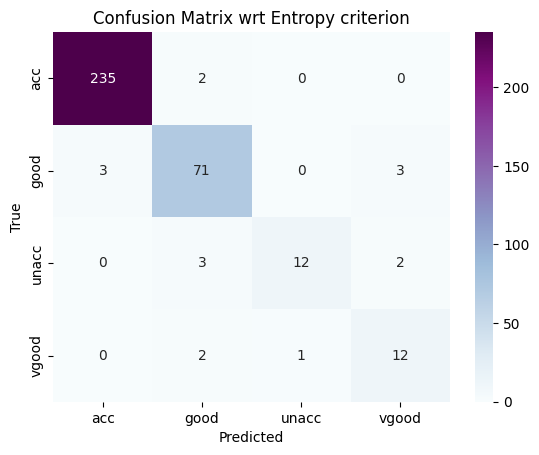

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Create a confusion matrix for the 'entropy' criterion model
cm2 = confusion_matrix(y_test, y_pred_entropy_final)

# Define class labels for the matrix
class_labels = ['acc', 'good', 'unacc', 'vgood']

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm2, columns=class_labels, index=class_labels)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BuPu')
plt.title('Confusion Matrix wrt Entropy criterion')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [101]:
from sklearn.metrics import classification_report

# Generate a classification report for the 'gini' criterion model
report_gini = classification_report(y_test, y_pred_ginifinal, target_names=class_labels)

print("Classification Report for 'gini' Criterion Model:")
print(report_gini)

Classification Report for 'gini' Criterion Model:
              precision    recall  f1-score   support

         acc       0.99      1.00      0.99       237
        good       0.96      0.92      0.94        77
       unacc       0.83      0.88      0.86        17
       vgood       0.75      0.80      0.77        15

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



In [102]:
from sklearn.metrics import classification_report

# Generate a classification report for the 'entropy' criterion model
report_entropy = classification_report(y_test, y_pred_entropy_final, target_names=class_labels)

print("Classification Report for 'entropy' Criterion Model:")
print(report_entropy)

Classification Report for 'entropy' Criterion Model:
              precision    recall  f1-score   support

         acc       0.99      0.99      0.99       237
        good       0.91      0.92      0.92        77
       unacc       0.92      0.71      0.80        17
       vgood       0.71      0.80      0.75        15

    accuracy                           0.95       346
   macro avg       0.88      0.85      0.86       346
weighted avg       0.95      0.95      0.95       346



In [103]:
!pip install graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Create a simple decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)  # X and y are your feature matrix and target labels

# Convert class labels to strings
y_str = y.astype(str)

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=y_str.unique(),  # Use y_str instead of y
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Save the tree visualization as a PDF or display it
graph.view()


'Source.gv.pdf'

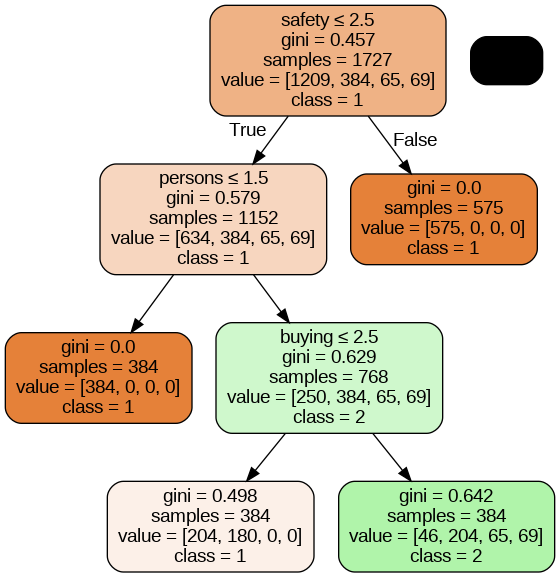

In [104]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

# Create a simple decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)  # X and y are your feature matrix and target labels

# Convert class labels to strings
y_str = y.astype(str)

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None,
               feature_names=X.columns,
               class_names=y_str.unique(),  # Use y_str instead of y
               filled=True, rounded=True,
               special_characters=True)

# Create a Graphviz object and render the tree
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


[Text(0.3778846153846154, 0.9615384615384616, 'x[5] <= 2.5\ngini = 0.452\nsamples = 1381\nvalue = [972, 307, 48, 54]'),
 Text(0.3625, 0.8846153846153846, 'x[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [505, 307, 48, 54]'),
 Text(0.3471153846153846, 0.8076923076923077, 'gini = 0.0\nsamples = 299\nvalue = [299, 0, 0, 0]'),
 Text(0.3778846153846154, 0.8076923076923077, 'x[0] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [206, 307, 48, 54]'),
 Text(0.13846153846153847, 0.7307692307692307, 'x[1] <= 2.5\ngini = 0.499\nsamples = 317\nvalue = [165, 152, 0, 0]'),
 Text(0.046153846153846156, 0.6538461538461539, 'x[0] <= 1.5\ngini = 0.315\nsamples = 153\nvalue = [123, 30, 0, 0]'),
 Text(0.03076923076923077, 0.5769230769230769, 'gini = 0.0\nsamples = 77\nvalue = [77, 0, 0, 0]'),
 Text(0.06153846153846154, 0.5769230769230769, 'x[1] <= 1.5\ngini = 0.478\nsamples = 76\nvalue = [46, 30, 0, 0]'),
 Text(0.046153846153846156, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0, 0]'),
 Text(0.07692307692

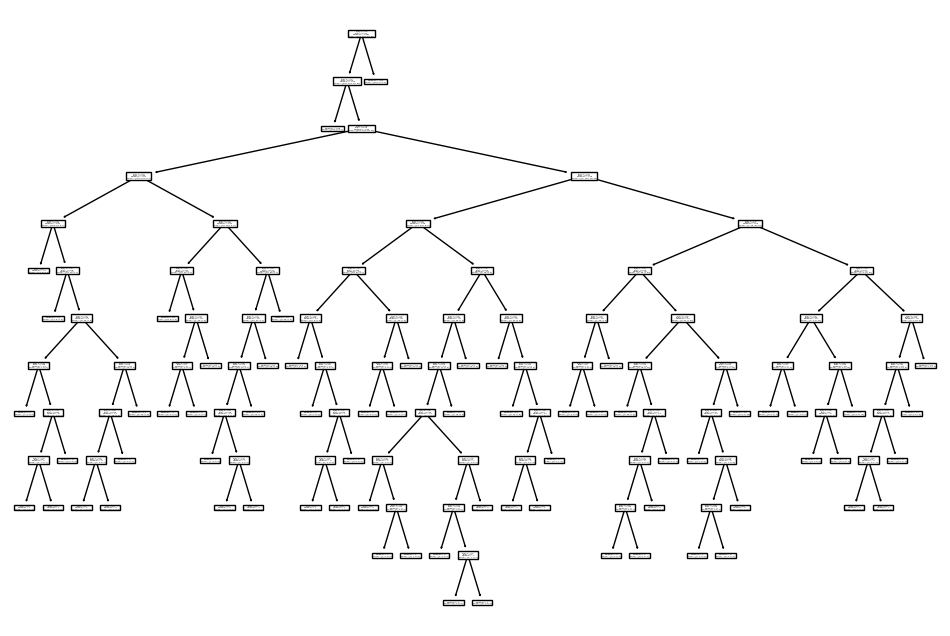

In [105]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create lists to store accuracy values
train_acc_gini = []
test_acc_gini = []

# Define a range of depths to explore
depths = range(1, 31)

# Create and evaluate Decision Tree models for different depths
for depth in depths:
    # Instantiate the Decision Tree Classifier model with criterion 'gini'
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=30)

    # Fit the model to the training data
    clf.fit(X_train, y_train)


plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train))